In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [1]:
import numpy as np
from math import dist
from scipy.io import loadmat
from matplotlib import pyplot as plt

%matplotlib inline

## Load the Data

In [2]:
data = loadmat('facesData/facesData.mat')

In [3]:
type(data)

dict

In [4]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'faces', 'labeles'])

In [5]:
faces,labels = data['faces'],data['labeles']

In [6]:
print(f"faces.shape: {faces.shape}")
print(f"labels.shape: {labels.shape}")

faces.shape: (165, 1024)
labels.shape: (165, 1)


### Visualize some Data

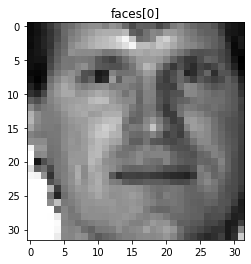

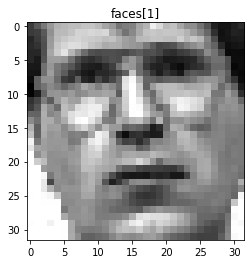

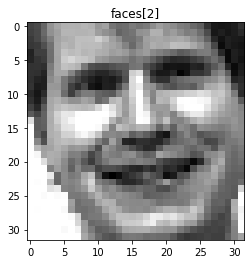

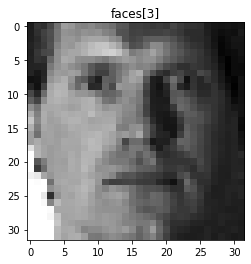

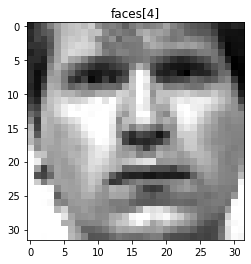

In [7]:
for i in range(5):
    plt.figure()
    plt.imshow(faces[i].reshape(32,32,order='F'), cmap='gray')
    plt.title(f"faces[{i}]")
plt.show()

Text(0.5, 1.0, 'Labels')

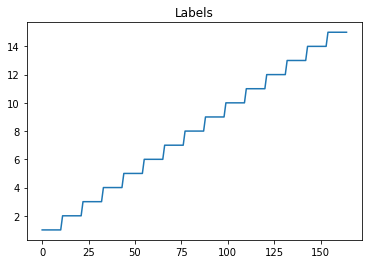

In [8]:
plt.figure()
plt.plot(labels)
plt.title('Labels')

## Split the Data

As requrested, each person will have 8 images for training and 3 images for testing:

### Train Data

In [9]:
train_indexes = [i for i in range(165) if (i+1) % 11 <= 8 and (i+1) % 11 > 0]
test_indexes = [i for i in range(165) if (i+1) % 11 > 8 or (i+1) % 11 == 0]

In [10]:
train_data = faces[train_indexes,:]
train_labels = labels[train_indexes]

In [11]:
test_data = faces[test_indexes,:]
test_labels = labels[test_indexes]

## Training

In [31]:
train_normalized = train_data - np.average(train_data, axis=0)

In [32]:
A = (1/120) * train_normalized.T.dot(train_normalized)
a,b = np.linalg.eigh(A)
sorted_indexes = np.flip(np.argsort(a))
b = (b[:,sorted_indexes]).T

In [33]:
train_b = train_normalized.copy()

for i in range(len(train_b)):
    train_b[i] = [np.inner(b[j], train_b[i]) for j in range(len(b))]

## Test

In [34]:
test_normalized = test_data - np.average(train_data, axis=0)

In [35]:
test_b = test_normalized.copy()
for i in range(len(test_b)):
    test_b[i] = [np.inner(b[j], test_b[i]) for j in range(len(b))]

In [36]:
success_rate = []
k_labels = np.zeros(test_b.shape[0])

for i in range(1,101):
    for j in range(test_b.shape[0]):
        idx = np.argmin([dist(test_b[j,:i], train_b[s,:i]) for s in range(len(train_b))])
        k_labels[j] = train_labels[idx]
    success_rate.append(np.sum(test_labels == k_labels)/len(test_labels))